In [1]:
import sys
import os
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add it to sys.path
sys.path.append(project_root)

In [2]:
from bimpcc.dataset import get_dataset
from bimpcc.models.tvdenoising_model import TVDenoisingMPCC
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

In [3]:
def plot_experiment(true,noisy,u, alpha):
    
    fig,ax = plt.subplots(1,3,figsize=(14,4))
    ax[0].imshow(true,cmap='gray')
    ax[0].set_title('True Image')
    ax[0].axis('off')
    ax[1].imshow(noisy,cmap='gray')
    ax[1].set_title('Noisy Image\nPSNR: {:.4f}'.format(psnr(true,noisy)))
    ax[1].axis('off')
    ax[2].imshow(u,cmap='gray')
    ax[2].set_title(f'Reconstructed Image\nPSNR: {psnr(true,u):.4f}\n alpha = {alpha}')
    # ax[2].set_xlabel('alpha = {}'.format(alpha))
    ax[2].axis('off')

    plt.show()

In [4]:
scale = 40

In [5]:
dataset = get_dataset("cameraman",scale=scale)
true, noisy = dataset.get_training_data()

(np.float64(-0.5), np.float64(39.5), np.float64(39.5), np.float64(-0.5))

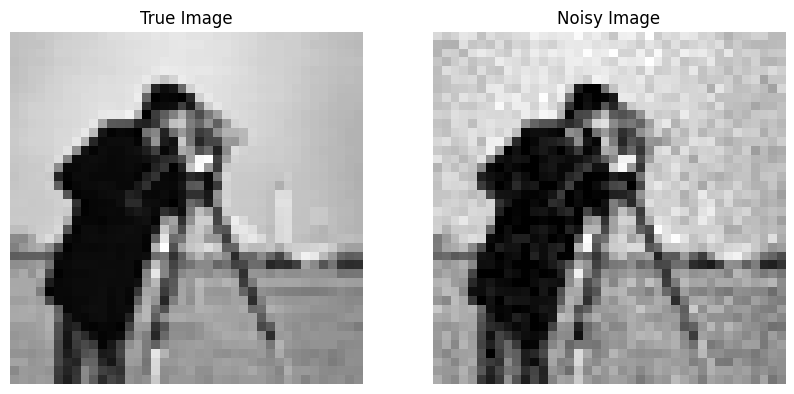

In [6]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(true,cmap='gray')
ax[0].set_title('True Image')
ax[0].axis('off')
ax[1].imshow(noisy,cmap='gray')
ax[1].set_title('Noisy Image')
ax[1].axis('off')

In [7]:
model = TVDenoisingMPCC(true,noisy,epsilon=1e-3,t_init=1.0)

In [ ]:
res,x_opt,fun_opt = model.solve(max_iter=20,t_min=1e-9,tol=1e-2,print_level=0,verbose=True, nlp_max_iter=5000, nlp_tol=1e-6)

Iter   Termination_status            Objective      MPCC_compl               t


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



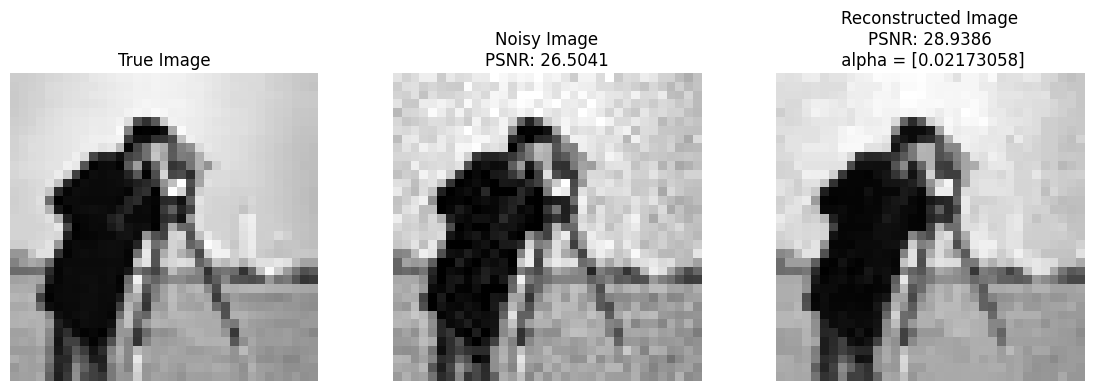

In [ ]:
u, q, r, delta, theta, alpha = model.parse_vars_fn(x_opt)
u = u.reshape((scale,scale))
plot_experiment(true,noisy,u,alpha)

In [ ]:
print(alpha-delta)

[-9.85435774e-09 -9.73792426e-09 -9.85128514e-09 -9.93374368e-09
 -9.95941687e-09 -9.91925798e-09 -9.81329019e-09  1.86633909e-04
 -9.74947748e-09 -9.88921018e-09 -9.84593569e-09 -9.88488641e-09
 -9.78914873e-09 -9.83690126e-09 -9.04357235e-09 -9.87909591e-09
 -9.91413093e-09 -9.90485781e-09 -9.88755881e-09 -9.94000786e-09
 -9.94520779e-09 -9.75468537e-09 -9.74894104e-09 -4.05998765e-09
 -9.89944410e-09 -8.99478983e-09 -9.91714813e-09 -9.90277471e-09
 -9.91551677e-09 -9.89383211e-09 -9.87820126e-09 -9.87821167e-09
 -9.71643187e-09 -9.90210464e-09 -9.48680325e-09 -9.82157070e-09
 -9.71599854e-09 -8.97565108e-09  3.40629392e-05  9.12214235e-05
 -9.60397788e-09 -9.90958290e-09 -9.77494022e-09 -9.91617301e-09
 -9.90002853e-09 -9.85501805e-09 -9.74457557e-09 -9.92776068e-09
 -9.89733062e-09 -9.70490332e-09  2.08972398e-05 -9.32848771e-09
 -9.25923727e-09  1.79943380e-05 -9.69957960e-09  4.37550670e-05
  1.86632997e-04 -9.86690540e-09  1.76735058e-04 -9.79097228e-09
 -9.53943521e-09 -9.57039

In [ ]:
r

array([0.04391893, 0.06477806, 0.08509695, 0.14581278, 0.24150661,
       0.1339347 , 0.0433102 , 0.00706495, 0.04697105, 0.10038657,
       0.03419642, 0.09505146, 0.06910312, 0.06841382, 0.03410578,
       0.05481847, 0.11774533, 0.08186215, 0.06994563, 0.19369267,
       0.21168172, 0.05033143, 0.46083711, 0.56752123, 0.18800952,
       0.04718324, 0.11118852, 0.11461569, 0.1399638 , 0.10519852,
       0.08347934, 0.11756256, 0.04841386, 0.12822362, 0.02232982,
       0.46039807, 0.14598389, 0.4581212 , 0.39275895, 0.14763303,
       0.37195165, 0.14402863, 0.0667227 , 0.13977807, 0.0871406 ,
       0.10020995, 0.0137315 , 0.17610316, 0.10333125, 0.13720984,
       0.63599951, 0.15998524, 0.72264859, 0.73657686, 0.2032853 ,
       0.30647246, 0.04577671, 0.40797926, 0.07634617, 0.0678969 ,
       0.01662365, 0.02148379, 0.02025647, 0.62235107, 0.10106358,
       0.202908  , 0.23648159, 0.75662451, 0.15481238, 0.38336022,
       0.13281239, 0.28706766, 0.12411952, 0.07625686, 0.02520

In [ ]:
q

array([-1.77527616e-04,  1.71953062e-04,  1.76095665e-04,  1.42228829e-07,
       -8.53499439e-05,  1.53776136e-04, -1.86634068e-04,  3.74131467e-09,
        3.83167523e-05, -7.19968908e-05,  1.84231062e-04, -9.76253621e-05,
       -1.55633009e-04, -4.22272557e-05, -1.69633773e-04, -1.81831498e-04,
        8.98340148e-05, -8.51079454e-05, -1.83709592e-04,  1.73658906e-04,
        3.03696825e-05, -1.36406017e-04,  1.48705700e-05, -4.24028314e-05,
        4.80666466e-05, -1.65278691e-04,  1.16541516e-04, -4.74251321e-05,
       -1.28464568e-04, -7.84487500e-06, -5.15437037e-05,  1.86052733e-04,
        1.77185086e-04,  1.00507168e-04,  4.77919336e-05, -1.86180148e-04,
       -1.66317981e-04,  1.66104460e-04,  2.89927037e-05, -3.89937237e-05,
        7.82335797e-05, -1.85241066e-04, -9.14667661e-05, -9.54244735e-05,
        1.82227524e-04,  1.86609869e-04, -1.68963536e-04,  1.05597737e-04,
       -5.28759655e-05, -1.86249745e-04, -1.65726832e-04,  1.40886785e-04,
        5.28852174e-05,  